# Case study on unsupervised learning

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_csv(r"C:\Users\sruth\OneDrive\Desktop\Wine_clust .csv")

## Basic details of dataset

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#missing values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No missing value found

In [8]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [9]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

## Outlier handling 

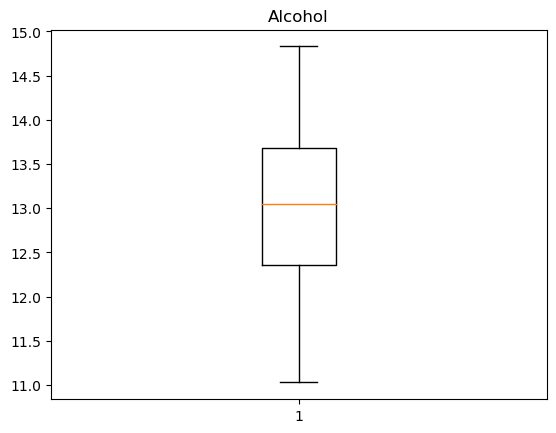

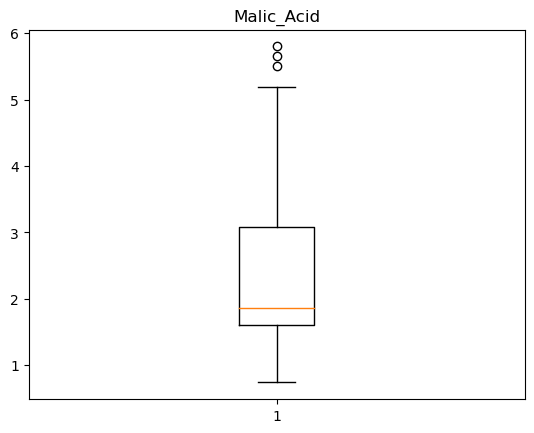

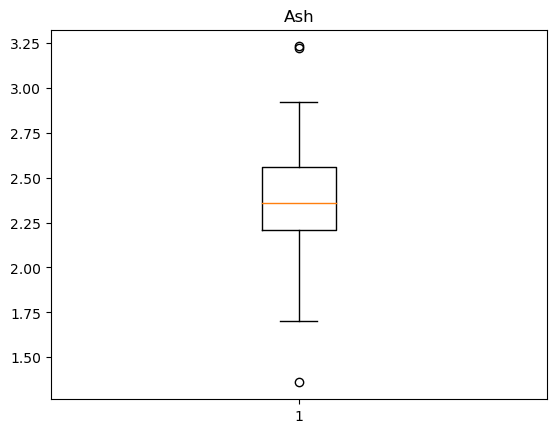

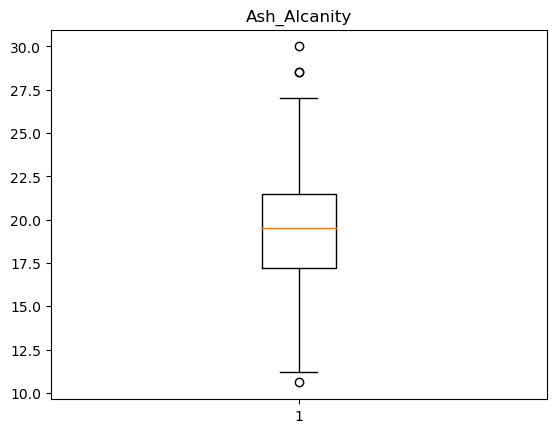

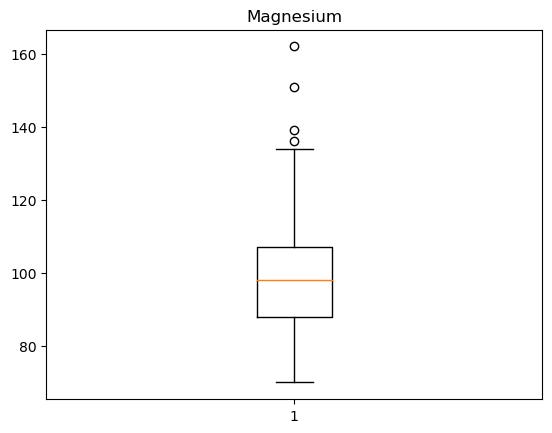

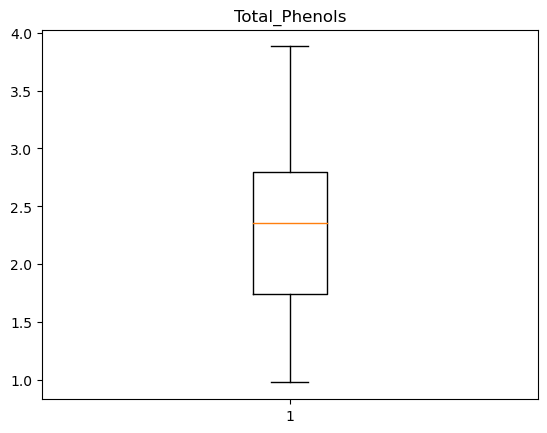

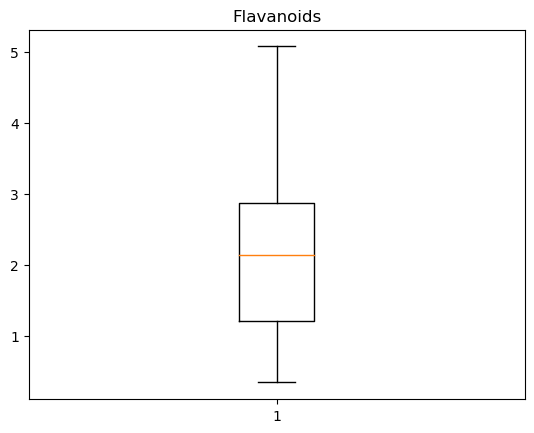

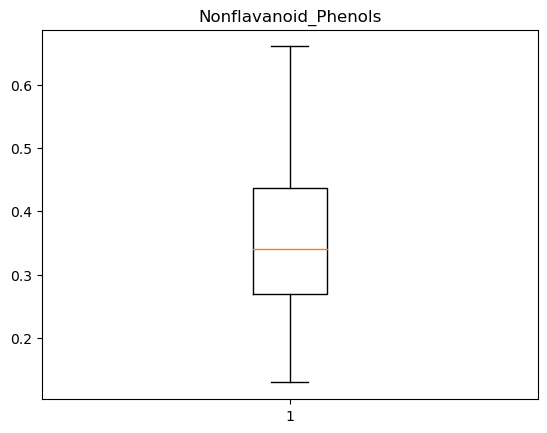

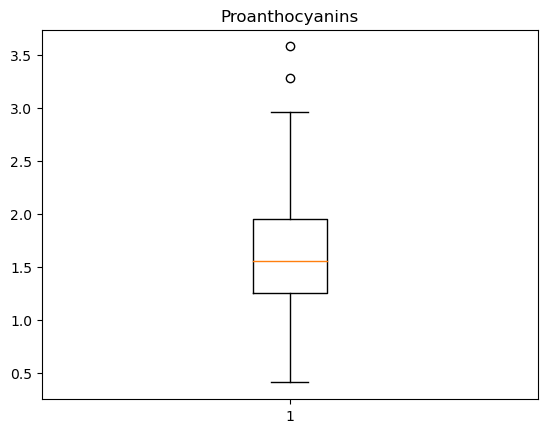

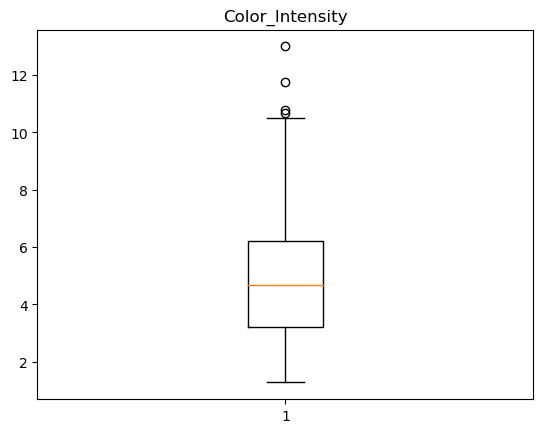

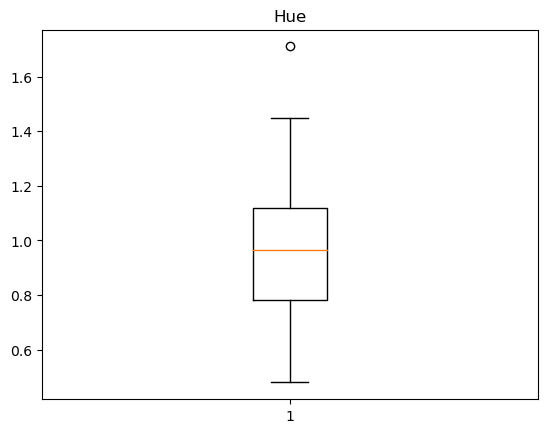

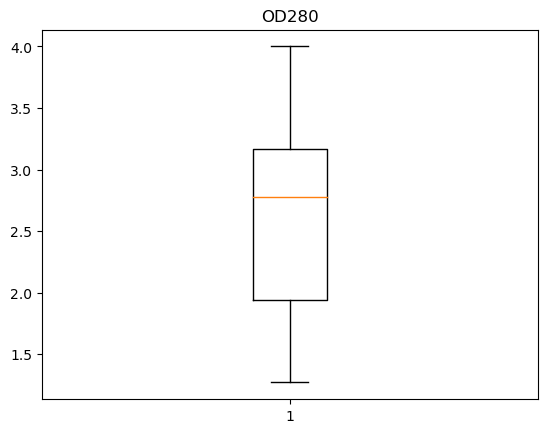

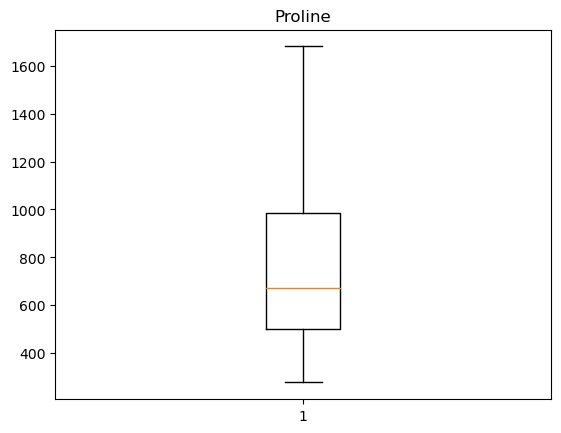

In [10]:
#Boxplot for finding outliers
num_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [11]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

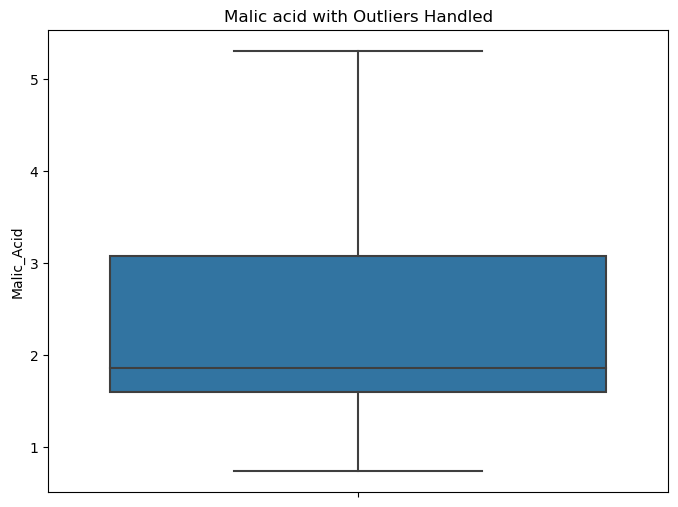

In [12]:
# Calculate the lower and upper limits 
Q1 = data['Malic_Acid'].quantile(0.25)
Q3 = data['Malic_Acid'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Malic_Acid'] = np.where(data['Malic_Acid'] < low_lim, low_lim, data['Malic_Acid'])
data['Malic_Acid'] = np.where(data['Malic_Acid'] > up_lim, up_lim, data['Malic_Acid'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Malic_Acid')
plt.title("Malic acid with Outliers Handled")
plt.ylabel('Malic_Acid')
plt.show()

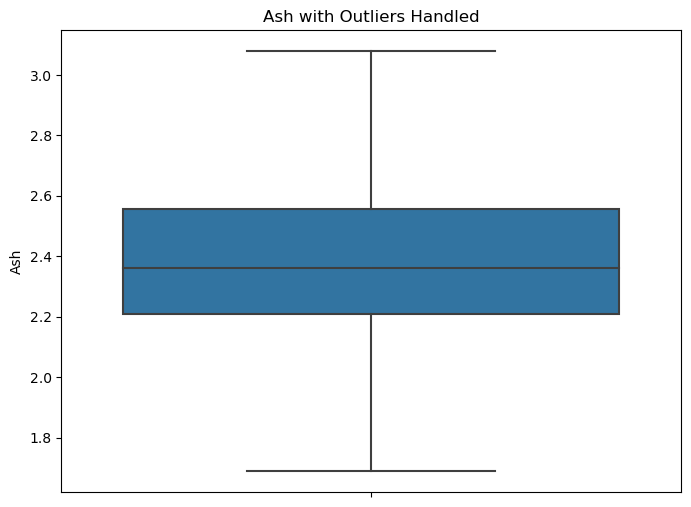

In [13]:
# Calculate the lower and upper limits 
Q1 = data['Ash'].quantile(0.25)
Q3 = data['Ash'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Ash'] = np.where(data['Ash'] < low_lim, low_lim, data['Ash'])
data['Ash'] = np.where(data['Ash'] > up_lim, up_lim, data['Ash'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Ash')
plt.title("Ash with Outliers Handled")
plt.ylabel('Ash')
plt.show()

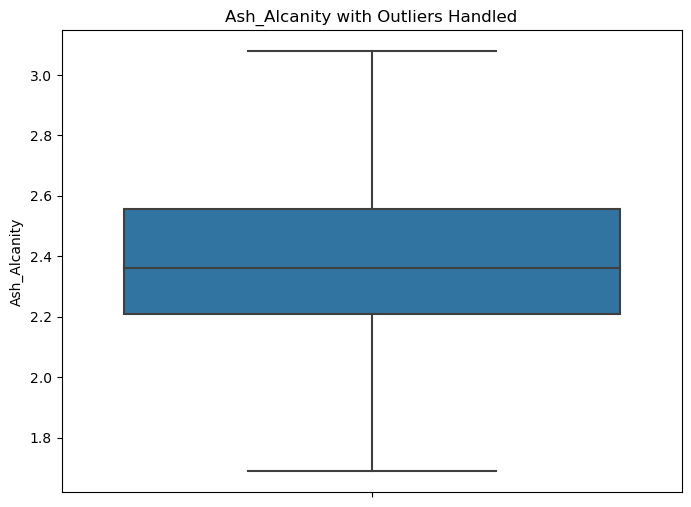

In [14]:
# Calculate the lower and upper limits 
Q1 = data['Ash_Alcanity'].quantile(0.25)
Q3 = data['Ash_Alcanity'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Ash_Alcanity'] = np.where(data['Ash_Alcanity'] < low_lim, low_lim, data['Ash'])
data['Ash_Alcanity'] = np.where(data['Ash_Alcanity'] > up_lim, up_lim, data['Ash'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Ash_Alcanity')
plt.title("Ash_Alcanity with Outliers Handled")
plt.ylabel('Ash_Alcanity')
plt.show()

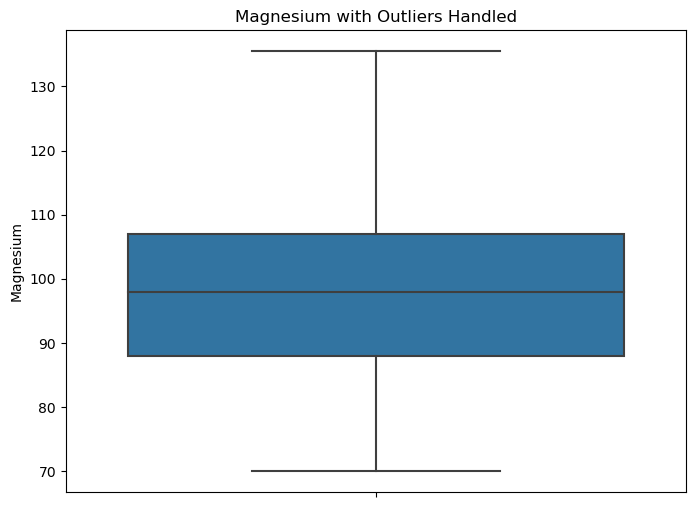

In [15]:
# Calculate the lower and upper limits 
Q1 = data['Magnesium'].quantile(0.25)
Q3 = data['Magnesium'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Magnesium'] = np.where(data['Magnesium'] < low_lim, low_lim, data['Magnesium'])
data['Magnesium'] = np.where(data['Magnesium'] > up_lim, up_lim, data['Magnesium'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Magnesium')
plt.title("Magnesium with Outliers Handled")
plt.ylabel('Magnesium')
plt.show()

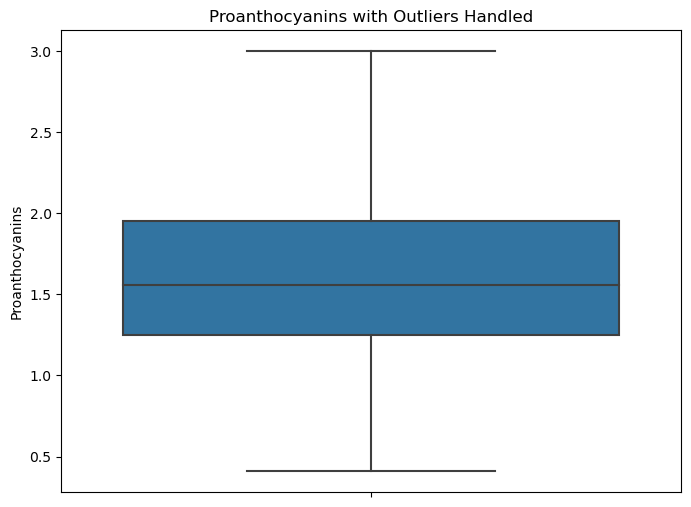

In [16]:
# Calculate the lower and upper limits 
Q1 = data['Proanthocyanins'].quantile(0.25)
Q3 = data['Proanthocyanins'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Proanthocyanins'] = np.where(data['Proanthocyanins'] < low_lim, low_lim, data['Proanthocyanins'])
data['Proanthocyanins'] = np.where(data['Proanthocyanins'] > up_lim, up_lim, data['Proanthocyanins'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Proanthocyanins')
plt.title("Proanthocyanins with Outliers Handled")
plt.ylabel('Proanthocyanins')
plt.show()

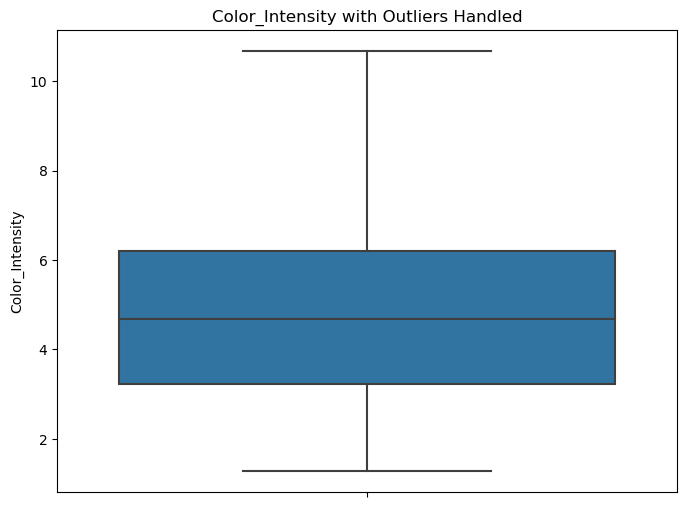

In [17]:
# Calculate the lower and upper limits 
Q1 = data['Color_Intensity'].quantile(0.25)
Q3 = data['Color_Intensity'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Color_Intensity'] = np.where(data['Color_Intensity'] < low_lim, low_lim, data['Color_Intensity'])
data['Color_Intensity'] = np.where(data['Color_Intensity'] > up_lim, up_lim, data['Color_Intensity'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Color_Intensity')
plt.title("Color_Intensity with Outliers Handled")
plt.ylabel('Color_Intensity')
plt.show()

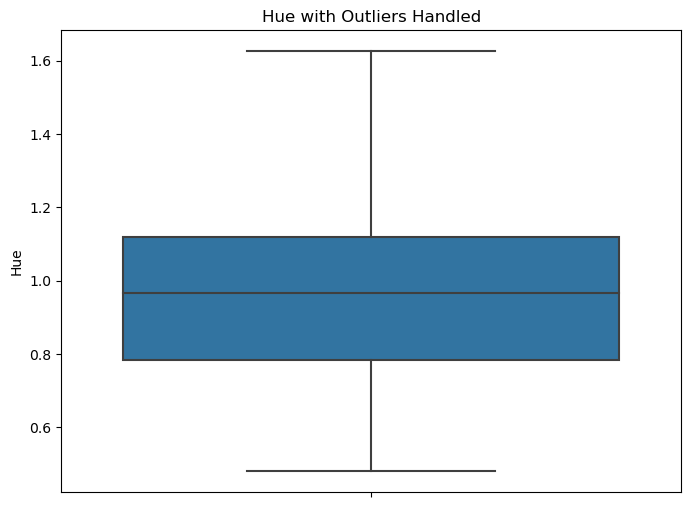

In [18]:
# Calculate the lower and upper limits 
Q1 = data['Hue'].quantile(0.25)
Q3 = data['Hue'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

# outlier handling
data['Hue'] = np.where(data['Hue'] < low_lim, low_lim, data['Hue'])
data['Hue'] = np.where(data['Hue'] > up_lim, up_lim, data['Hue'])

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Hue')
plt.title("Hue with Outliers Handled")
plt.ylabel('Hue')
plt.show()

In [19]:
df=data

In [20]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
#values are stored as numpy array
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
#converted to DataFrame
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,1.883637e-16,-4.465841e-16,-4.465841e-16,-1.702758e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,1.503167e-16,-1.197544e-16,7.484650e-18,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.578195e+00,-2.204108e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-5.959788e-01,-8.584597e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,-2.555683e-02,-1.108774e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,7.254987e-01,5.619467e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.707715e+00,2.692556e+00,2.539515e+00,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


In [21]:
scaled_data.shape

(178, 13)

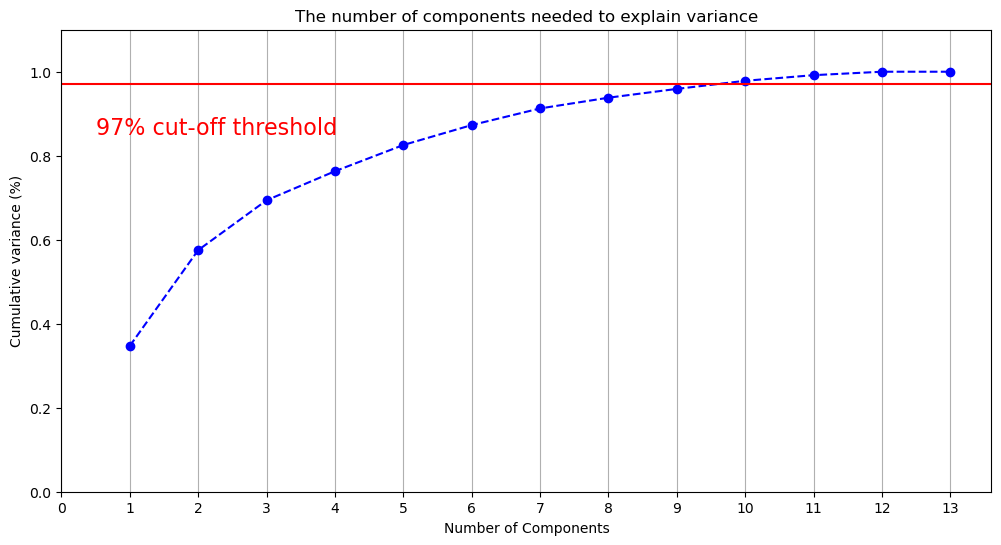

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)
# .rcParams is a dictionary-like object in matplotlib that stores the runtime configuration settings for the library
#  It provides a way to customize the behavior and appearance of matplotlib plots

fig, ax = plt.subplots()
#creates new figure and axes object
# fig: variable representing the figure
# ax: variable representing the axes on which the data is plotted

xi = np.arange(1,14, step=1)
# creates an array xi that contains numbers from 1 to 13 (inclusive) with a step of 1
#  used as the x-values for plotting purposes

y = np.cumsum(pca.explained_variance_ratio_)
# calculates the cumulative sum of the explained variance ratio from a PCA (Principal Component Analysis) object, 
# assuming pca is a valid PCA model
# resulting values are stored in the array 'y' and are typically used as the y-values for plotting


# setting the y axis limits
plt.ylim(0.0,1.1)
# The first argument 0.0 represents the lower limit, and the second argument 1.1 represents the upper limit
# y axis ranges from 0 to 1.1

plt.plot(xi, y, marker='o', linestyle='--', color='b')
# setting plot characteristics of the graph

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
# adds a horizontal line to the plot at the y-coordinate value of 0.97

plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# adds a text annotation to the plot at the specified coordinates
# 0.5, represents the x-coordinate of the text position, and 0.85, represents the y-coordinate

ax.grid(axis='x')
plt.show()

In [23]:
#another method of doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 2)

In [24]:
pca.components_.shape

(2, 13)

In [25]:
pca.components_

array([[-0.14365927,  0.24498838, -0.038985  , -0.038985  , -0.15375064,
        -0.41009279, -0.43835557,  0.29615508, -0.33191426,  0.08823925,
        -0.30315814, -0.38951117, -0.28817913],
       [-0.37017197, -0.21105316, -0.44221089, -0.44221089, -0.29562019,
        -0.04898379,  0.00577959, -0.08432933, -0.00519632, -0.42484297,
         0.22068129,  0.13829186, -0.2864426 ]])

In [26]:
x_pca

array([[-3.19155596, -1.31546586],
       [-1.57449421,  0.90644492],
       [-2.65297768, -1.4744722 ],
       [-3.72846488, -2.45619126],
       [-1.34492022, -2.0291396 ],
       [-2.8632296 , -1.87950332],
       [-2.17437431, -1.00950471],
       [-2.05616076, -1.93888147],
       [-2.11155094, -0.11212912],
       [-2.54028128, -0.2477223 ],
       [-3.45900291, -0.75799597],
       [-1.56101583, -0.24370063],
       [-1.90731819, -0.49822583],
       [-2.99408701, -0.81373418],
       [-3.91733867, -1.55704942],
       [-2.30353203, -2.15312806],
       [-2.40451425, -2.75952856],
       [-2.09200398, -1.98165742],
       [-3.46104332, -2.24703852],
       [-1.90050887, -1.30381961],
       [-2.9747276 , -0.41606177],
       [-1.15685781, -0.86436377],
       [-2.39037662,  0.18768644],
       [-1.59735676,  0.14359335],
       [-1.91873687, -0.23813282],
       [-1.70043951, -2.52183973],
       [-1.63698334, -1.08204542],
       [-0.98515113,  0.72810372],
       [-2.39519612,

## Kmeans Clustering

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


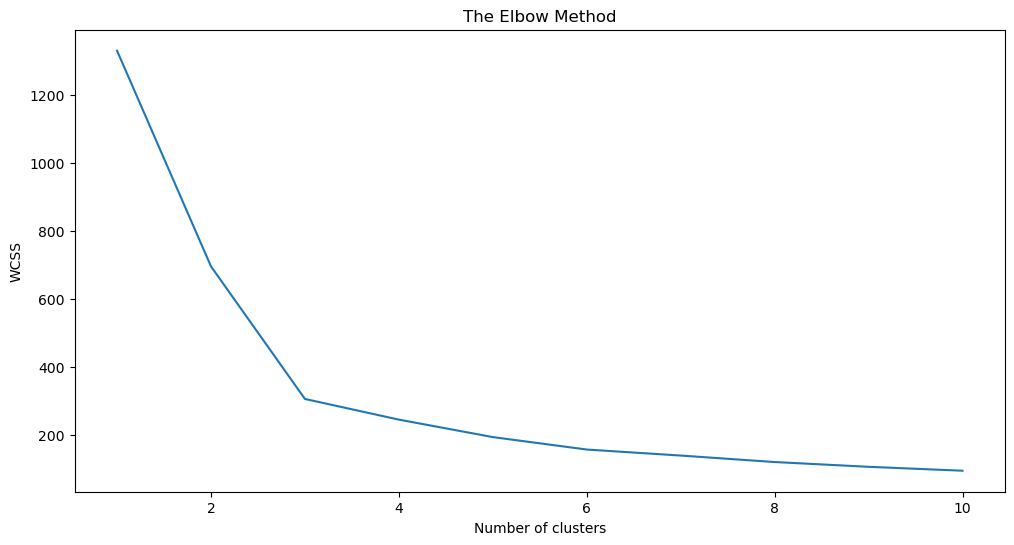

In [27]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init ='k-means++', random_state =42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#k-means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)


In [29]:
#Assigning cluster to Customer type

# Get the cluster labels for each sample
labels = kmeans.labels_


# Add a new column for customer types based on cluster labels
data['Cluster'] = labels

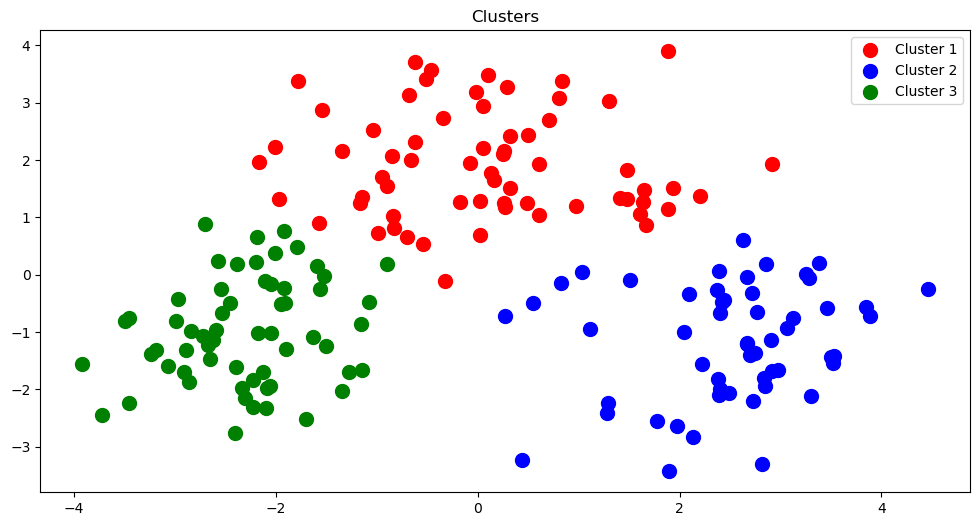

In [30]:
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

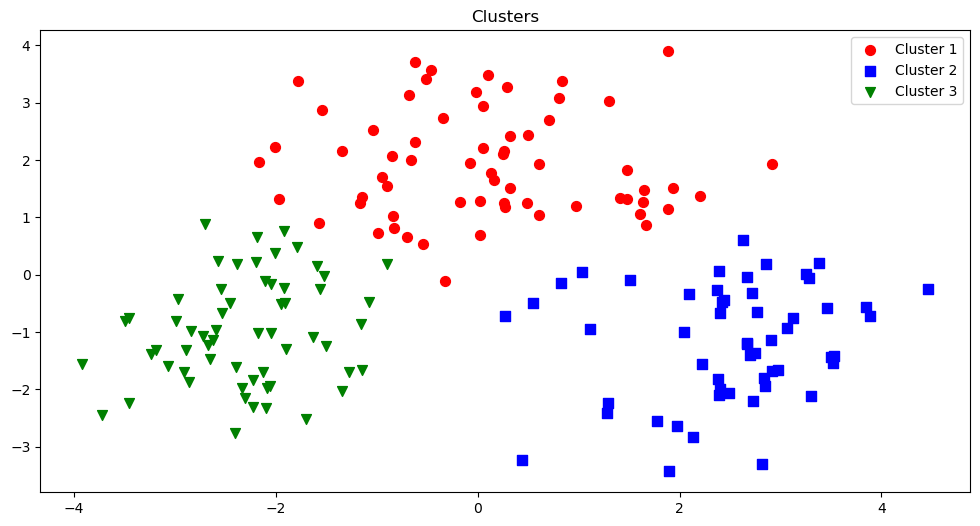

In [31]:
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3', marker = 'v')

plt.title('Clusters')
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

In [32]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,2.43,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,2.14,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,2.67,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,2.50,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,2.87,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [33]:
from sklearn.metrics import silhouette_score

In [34]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(x_pca, y_kmeans)
print(silhouette_avg1)



0.5371165791645026


## Agglomerative clustering

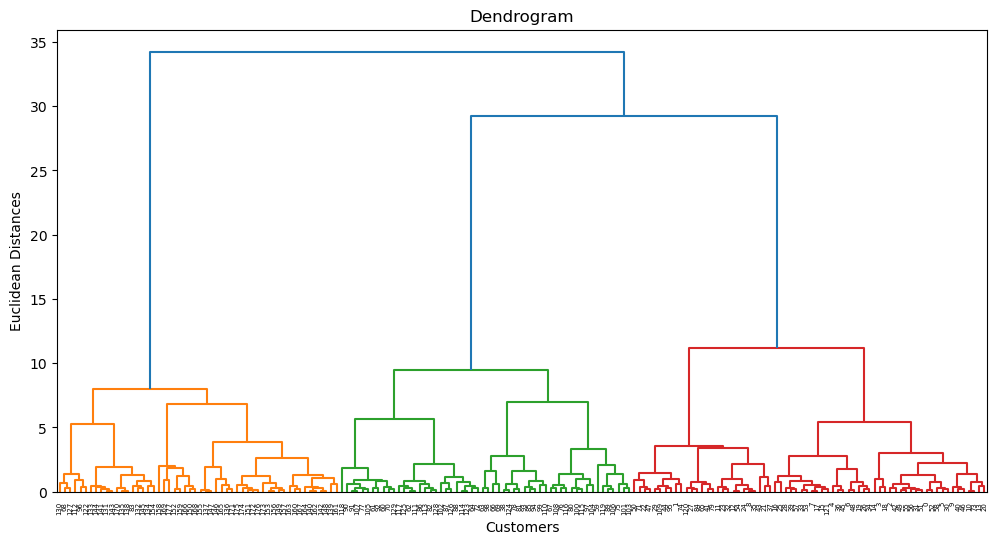

In [35]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_pca, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')


y_hc = hc.fit_predict(x_pca)


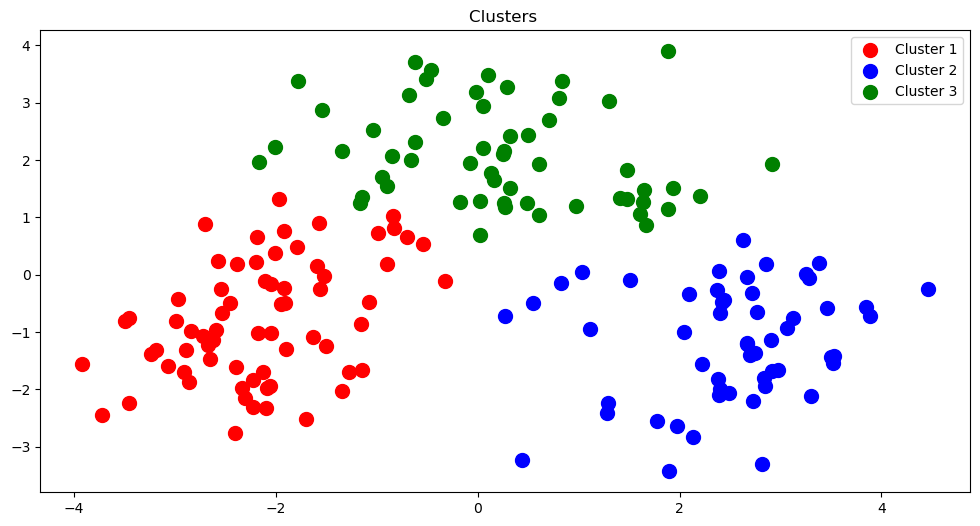

In [37]:
# Plotting data points from Cluster 1
plt.scatter(x_pca[y_hc == 0, 0], x_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

# Plotting data points from Cluster 2
plt.scatter(x_pca[y_hc == 1, 0], x_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# Plotting data points from Cluster 3
plt.scatter(x_pca[y_hc == 2, 0], x_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.title('Clusters ')
plt.xlabel('')
plt.ylabel('')
plt.legend()

In [38]:
from sklearn.metrics import silhouette_score
#Silhouette score of agglomerative clustering
silhouette_avg_ag= silhouette_score(x_pca, y_hc)
print(silhouette_avg_ag)

0.5276920417878571


## Hierarcheal Clustering

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

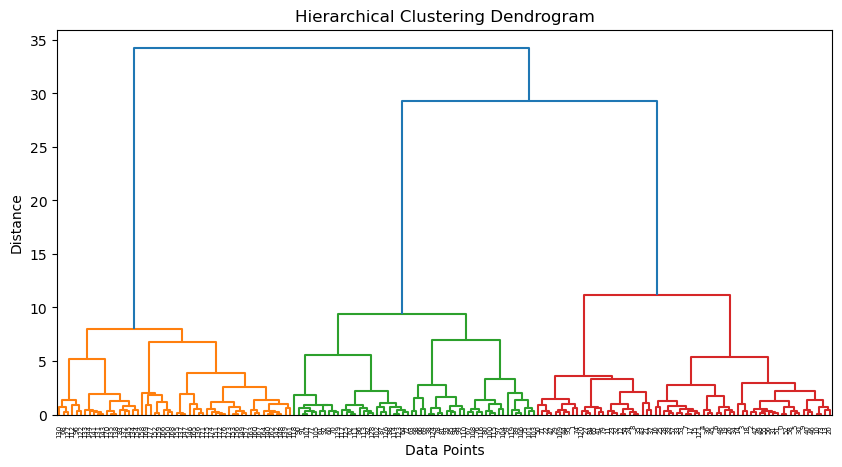

In [40]:

# Perform hierarchical clustering
linked = linkage(x_pca, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
#Silhouette score of hieraracheal clustering
silhouette_avg_h = silhouette_score(x_pca, y_hc)
print(silhouette_avg_h)

0.5276920417878571


## Density-Based Spatial Clustering of Applications with Noise (DBSCAN) 

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
data1 = pd.read_csv(r"C:\Users\sruth\OneDrive\Desktop\Wine_clust .csv")

In [44]:
data1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [45]:
X = data1[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']].values

In [46]:
X1=data1[['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity']]

In [47]:
dbscan = DBSCAN(eps=35, min_samples=2)  # Adjust the parameters as needed
dbscan.fit(X)

DBSCAN(eps=35, min_samples=2)

In [48]:
labels = dbscan.labels_
core_samples = dbscan.core_sample_indices_

In [49]:
labels


array([ 0,  0,  1,  2,  3,  2,  4,  4,  0,  0,  2,  4,  4,  0,  2,  4,  4,
        0, -1,  5,  3,  3,  0,  0,  5,  5,  1,  4,  5,  0,  4,  2,  0,  4,
        0,  5,  5,  0,  0,  3,  3,  0,  0,  3,  5,  0,  0,  0,  0,  4,  0,
        4,  1, -1,  0,  0,  0,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3, -1,  5,  3,  3,  0,  5,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  5,  5,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  5,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  5,  5,  3], dtype=int64)

In [50]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)



Number of clusters: 6
Number of noise points: 4


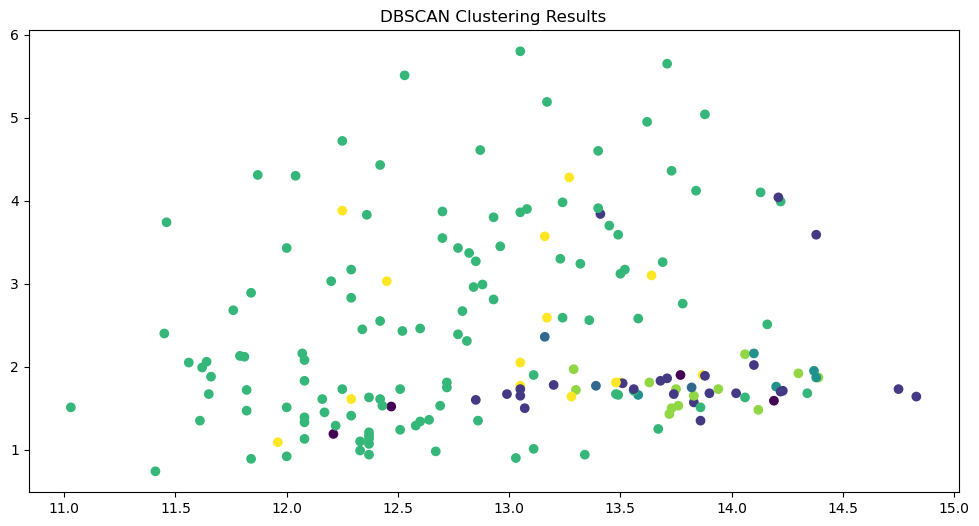

In [51]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN Clustering Results")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [52]:
from sklearn.metrics import pairwise_distances

# Assuming X is your feature matrix
distances = pairwise_distances(X)

labels = dbscan.labels_
core_samples = dbscan.core_sample_indices_

silhouette_scores = []
for i in range(len(X)):
    if i in core_samples and labels[i] != -1:
        a = np.mean(distances[i, labels == labels[i]])
        b = np.min(np.mean(distances[i, labels != labels[i]]))
        silhouette_scores.append((b - a) / max(a, b))

average_silhouette_score = np.mean(silhouette_scores)

In [53]:
average_silhouette_score

0.7754424333438616

In [54]:
labels = dbscan.labels_
data['cluster'] = labels
data['cluster'].nunique()

7

In [55]:
print("Silhouette score for K means Clustering:", silhouette_avg1)
print("Silhouette score for Agglomerative Clustering:", silhouette_avg_ag)
print("Silhouette score for Hierarchical Clustering:", silhouette_avg_h)
print("Silhouette score for DBSCAN Clustering:", average_silhouette_score)

Silhouette score for K means Clustering: 0.5371165791645026
Silhouette score for Agglomerative Clustering: 0.5276920417878571
Silhouette score for Hierarchical Clustering: 0.5276920417878571
Silhouette score for DBSCAN Clustering: 0.7754424333438616


Based on the silhouette scores, it seems that DBSCAN has performed better in terms of cluster separation compared to K-means, agglomerative, and hierarchical clustering methods. 